In [1]:
import os.path

import numpy as np

from notebooks.analytics.utils import init_analysis, savefig, boxplot_metric

In [2]:
EXP_NAME = "daeclust_2000_05-clusters" # multi clusters, tol: 2, all fixed same setup as fed_avg_08
#EXP_NAME = "daeclust_2000_06-clusters" # multi clusters, tol: 2, all fixed
#EXP_NAME = "daeclust_2000_07-clusters" # multi clusters, tol: 2, all fixed
#EXP_NAME = "daeclust_09-clusters" # multi clusters, tol: 2, all fixed
df = init_analysis(EXP_NAME)

In [3]:
df.columns

Index(['Unnamed: 0', 'epoch', 'training_loss', 'validation_loss',
       'validation_acc', 'mlflow.user', 'mlflow.source.name',
       'mlflow.source.type', 'dataset', 'model_name', 'cluster_id', 'round_id',
       'trainer_id', 'test', 'balanced', 'partition_index', 'n_partitions',
       'n_samples', 'mlflow.runName'],
      dtype='object')

C:\Users\micdu\AppData\Local\Temp\ipykernel_28768\114399303.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()
C:\Users\micdu\AppData\Local\Temp\ipykernel_28768\114399303.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()
C:\Users\micdu\AppData\Local\Temp\ipykernel_28768\114399303.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()


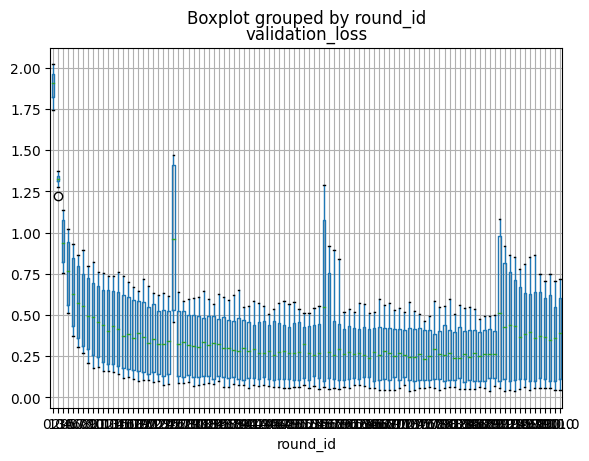

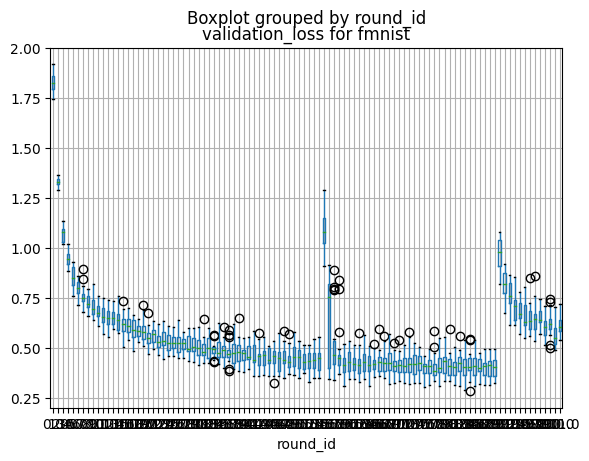

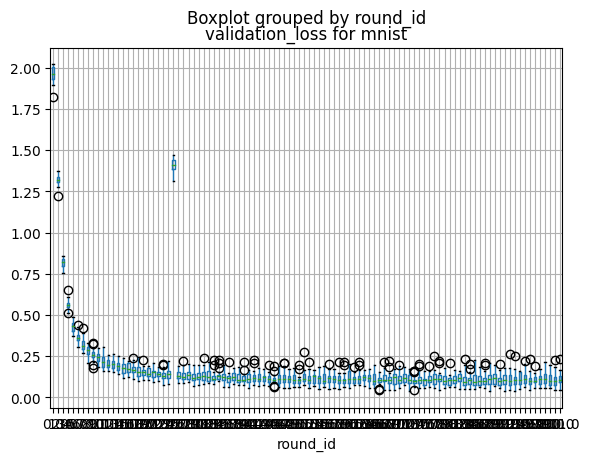

In [11]:
def boxplot_metric(df, metric):
    if metric in df.columns:
        plot_ax = df.groupby(["round_id", "trainer_id"]).max().boxplot(metric, by="round_id")
        plot_fig = plot_ax.get_figure()
        savefig(plot_fig, metric)
        plot_fig.show()
        datasets = df.dataset.unique()
        if len(datasets) > 1:
            for dataset in datasets:
                    plot_ax = df.loc[df.dataset == dataset].groupby(["round_id", "trainer_id"]).max().boxplot(
                        metric, by="round_id")
                    plot_ax.set_title(f"{metric} for {dataset}")
                    plot_fig = plot_ax.get_figure()
                    savefig(plot_fig, f"{metric}_{dataset}")
                    plot_fig.show()
boxplot_metric(df,"validation_loss")

C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()
C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:80: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()
C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:80: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()


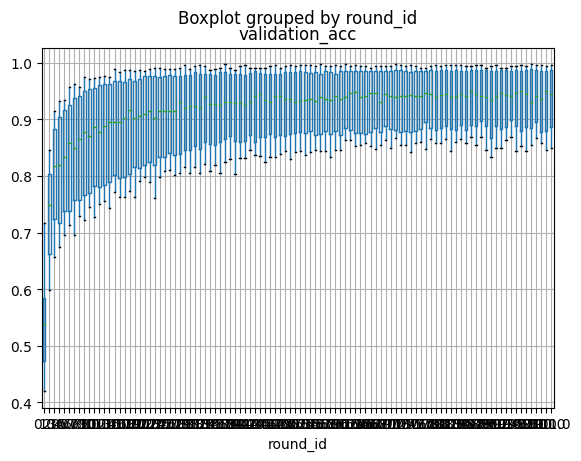

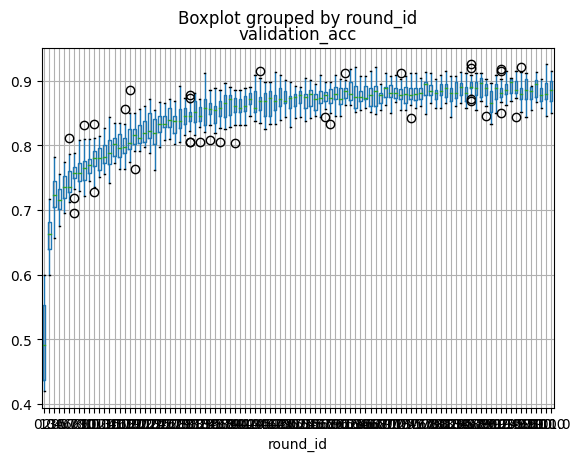

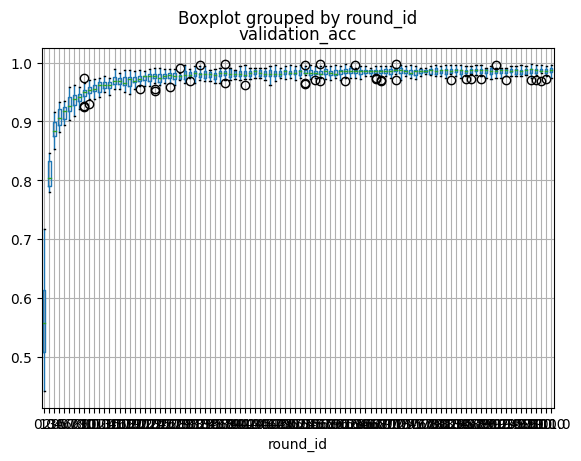

In [5]:
boxplot_metric(df, "validation_acc")

In [6]:
dataset_perf = df.loc[df.round_id < 32].groupby(["round_id","dataset"])
dataset_perf["validation_loss"].mean()

round_id  dataset
0.0       fmnist     1.832075
          mnist      1.957374
1.0       fmnist     1.291173
          mnist      1.249119
2.0       fmnist     1.020152
                       ...   
29.0      mnist      0.102264
30.0      fmnist     0.455166
          mnist      0.100757
31.0      fmnist     0.463527
          mnist      0.098675
Name: validation_loss, Length: 64, dtype: float64

C:\Users\micdu\AppData\Local\Temp\ipykernel_28768\1895144522.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cluster_count_fig.show()


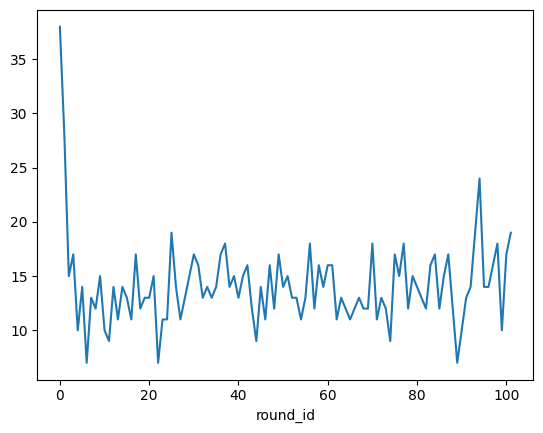

In [7]:
cluster_count_ax = df.groupby("round_id")["cluster_id"].nunique().plot()
cluster_count_fig = cluster_count_ax.get_figure()
savefig(cluster_count_fig, "cluster_count")
cluster_count_fig.show()

In [8]:
n_clusters = df.groupby("round_id")["cluster_id"].nunique()
loss = df.groupby("round_id")["validation_loss"].mean()

np.corrcoef(loss, n_clusters)

array([[1.        , 0.54938417],
       [0.54938417, 1.        ]])

In [9]:
np.corrcoef(loss[1:], n_clusters[:len(n_clusters)-2])

array([[1.        , 0.49744038],
       [0.49744038, 1.        ]])